IMPORTING LIABRARIES

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

READING THE DATASET

In [2]:
data = pd.read_csv("merge_data.csv")

In [3]:
data.head()

ID  Age of the patient  Gender of the patient  Total Bilirubin  \
0  ID_001                65.0                    1.0              0.7   
1  ID_002                62.0                    0.0             10.9   
2  ID_003                62.0                    0.0              7.3   
3  ID_004                58.0                    0.0              1.0   
4  ID_005                72.0                    0.0              3.9   

   Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0               0.1                         187.0   
1               5.5                         699.0   
2               4.1                         490.0   
3               0.4                         182.0   
4               2.0                         195.0   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                           16.0                             18.0   
1                           64.0                            100.0   
2                           60.0                             68.0   
3                           14.0                             20.0   
4                           27.0                             59.0   

   Total Protiens  ALB Albumin  A/G Ratio Albumin and Globulin Ratio  \
0             6.8          3.3                                  0.90   
1             7.5          3.2                                  0.74   
2             7.0          3.3                                  0.89   
3             6.8          3.4                                  1.00   
4             7.3          2.4                                  0.40   

  City_Code State_Code     State Name City name  Status  
0      CT01       ST15    Maharashtra    Mumbai       1  
1      CT28       ST11      Jharkhand    Ranchi       1  
2      CT12       ST28  Uttar Pradesh     Noida       1  
3      CT21       ST27    Uttarakhand  Dehradun       1  
4      CT03       ST24     Tamil Nadu   Chennai       1

DATA DESCRIPTION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30677 entries, 0 to 30676
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    30677 non-null  object 
 1   Age of the patient                    30675 non-null  float64
 2   Gender of the patient                 29779 non-null  float64
 3   Total Bilirubin                       30033 non-null  float64
 4   Direct Bilirubin                      30119 non-null  float64
 5   Alkphos Alkaline Phosphotase          29880 non-null  float64
 6   Sgpt Alamine Aminotransferase         30139 non-null  float64
 7   Sgot Aspartate Aminotransferase       30214 non-null  float64
 8   Total Protiens                        30213 non-null  float64
 9   ALB Albumin                           30183 non-null  float64
 10  A/G Ratio Albumin and Globulin Ratio  30118 non-null  float64
 11  City_Code      

In [5]:
data.describe()

Age of the patient  Gender of the patient  Total Bilirubin  \
count        30675.000000           29779.000000     30033.000000   
mean            44.107971               0.261997         3.370629   
std             15.981066               0.439728         6.256466   
min              4.000000               0.000000         0.400000   
25%             32.000000               0.000000         0.800000   
50%             45.000000               0.000000         1.000000   
75%             55.000000               1.000000         2.700000   
max             90.000000               1.000000        75.000000   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
count      30119.000000                  29880.000000   
mean           1.528225                    289.048293   
std            2.870060                    238.570823   
min            0.100000                     63.000000   
25%            0.200000                    175.000000   
50%            0.300000                    209.000000   
75%            1.300000                    298.000000   
max           19.700000                   2110.000000   

       Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
count                   30139.000000                     30214.000000   
mean                       81.479711                       111.453531   
std                       182.184895                       280.898133   
min                        10.000000                        10.000000   
25%                        23.000000                        26.000000   
50%                        35.000000                        42.000000   
75%                        61.000000                        88.000000   
max                      2000.000000                      4929.000000   

       Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  \
count    30213.000000  30183.000000                          30118.000000   
mean         6.480363      3.130249                              0.943503   
std          1.082075      0.792355                              0.323197   
min          2.700000      0.900000                              0.300000   
25%          5.800000      2.600000                              0.700000   
50%          6.600000      3.100000                              0.900000   
75%          7.200000      3.800000                              1.100000   
max          9.600000      5.500000                              2.800000   

             Status  
count  30677.000000  
mean       0.714118  
std        0.451841  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [6]:
data.shape

(30677, 16)

RENAMING THE AGE AND GENDER COLUMN 

In [7]:
data.rename(columns={'Age of the patient':'Age','Gender of the patient':'Gender'},inplace=True)

LOOKING FOR MISSING VALUES

In [8]:
data.isnull().sum()

ID                                        0
Age                                       2
Gender                                  898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
City_Code                                 0
State_Code                                0
State Name                                0
City name                                 0
Status                                    0
dtype: int64

<Axes: >

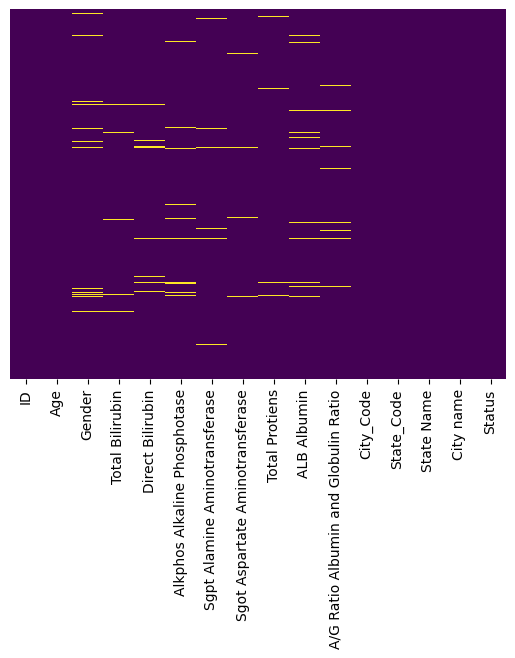

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

IDENTIFYING THE NEEDED COLUMNS AS CATEGORICAL AND NUMERICAL 

In [10]:
cols_to_drop=['ID','State_Code','City_Code']
categorical_cols=[col for col in data.columns if data[col].dtypes=='O'and col not in cols_to_drop]
numerical_cols=[col for col in data.columns if col not in categorical_cols and col not in cols_to_drop]

DETECTION OF OUTLIERS IN NUMERICAL DATA

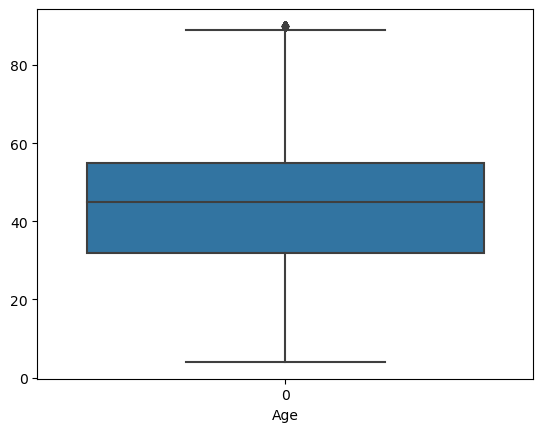

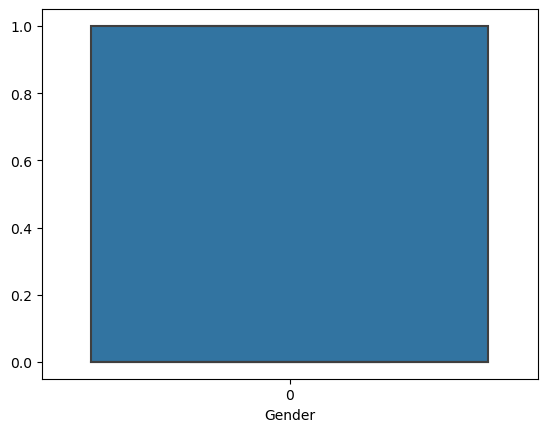

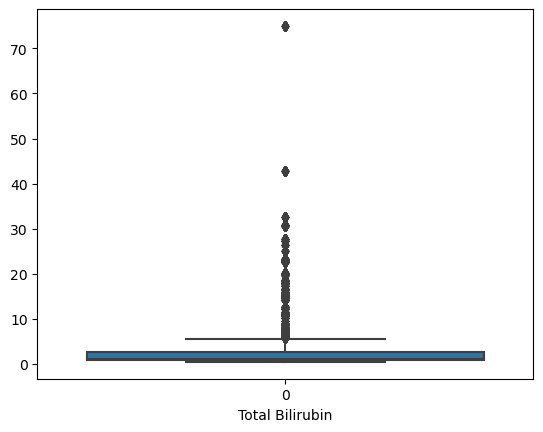

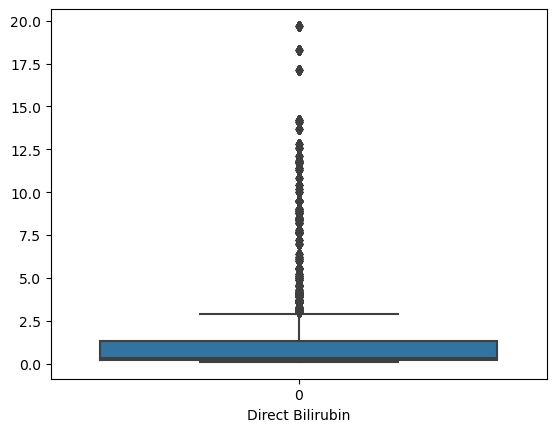

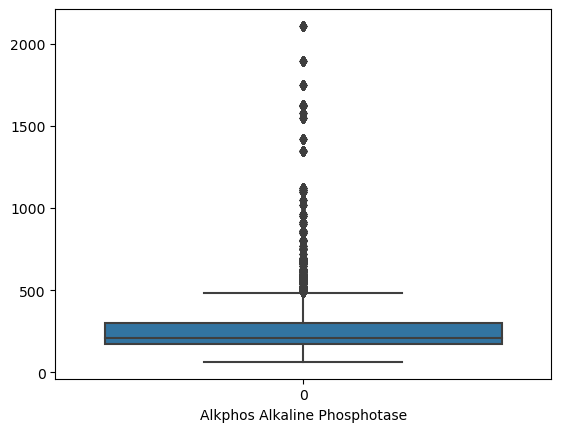

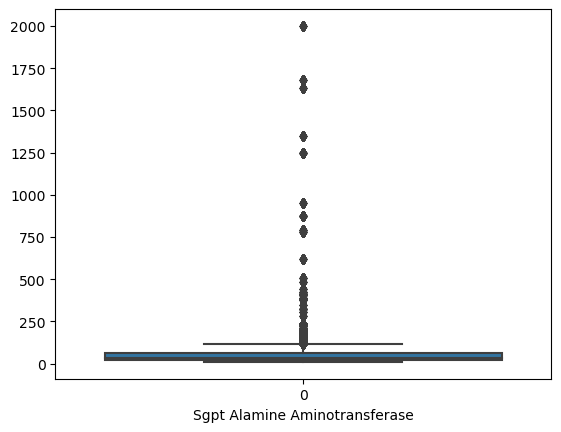

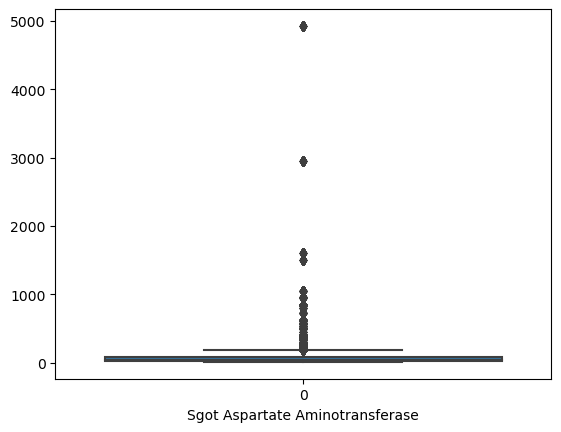

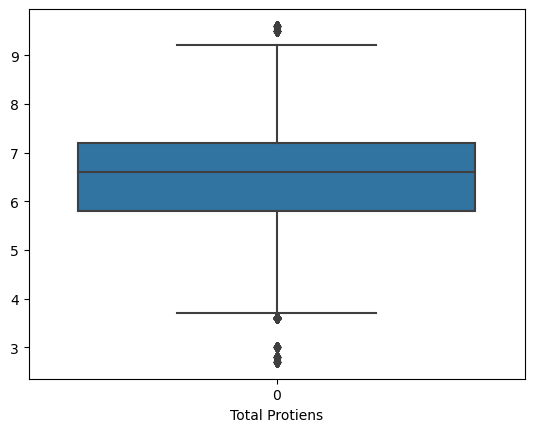

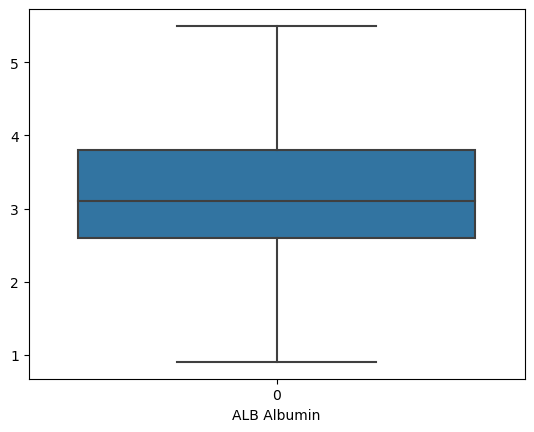

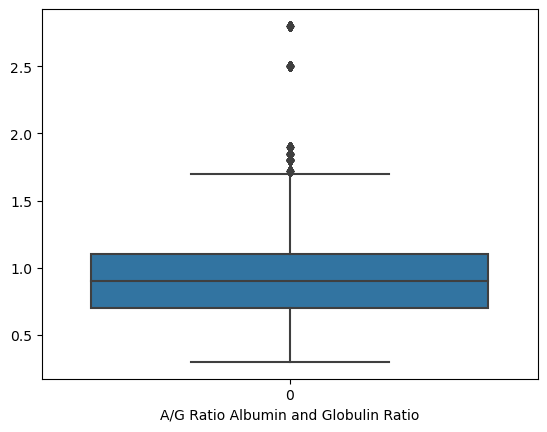

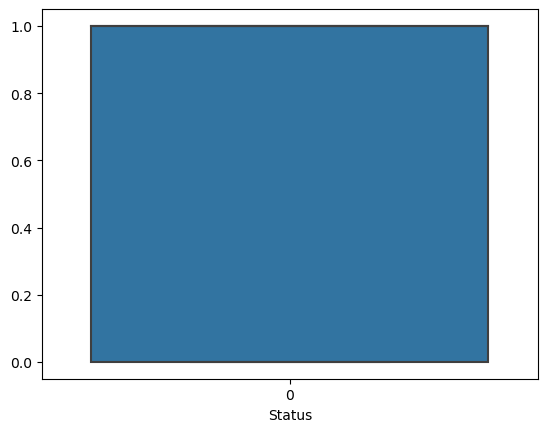

In [11]:
for col in numerical_cols:
 sns.boxplot(data[col])
 plt.xlabel(col)
 plt.show()

DISRTIBUTION OF NUMERIC DATA

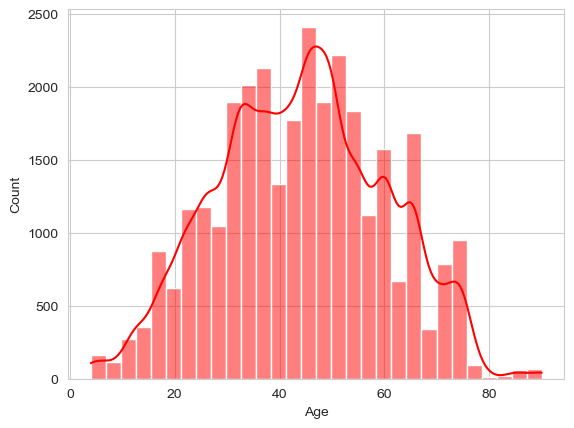

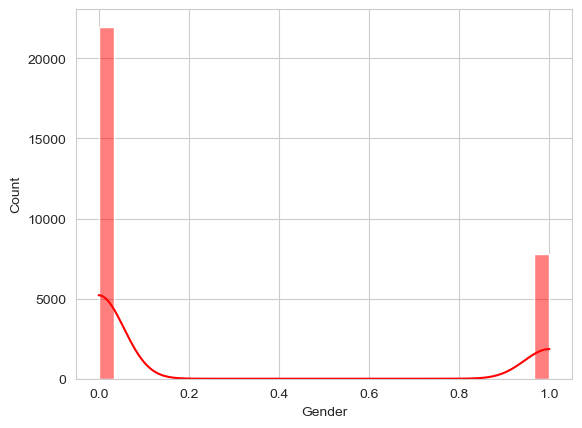

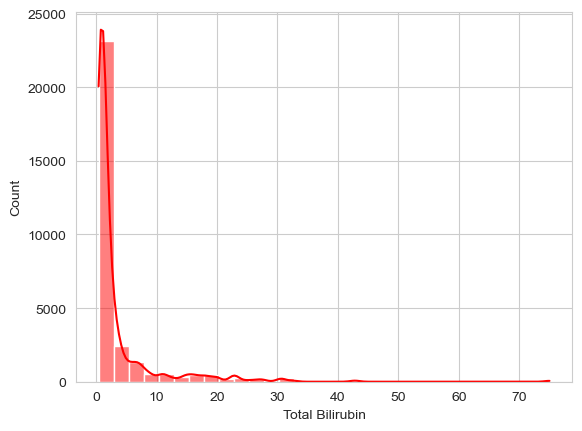

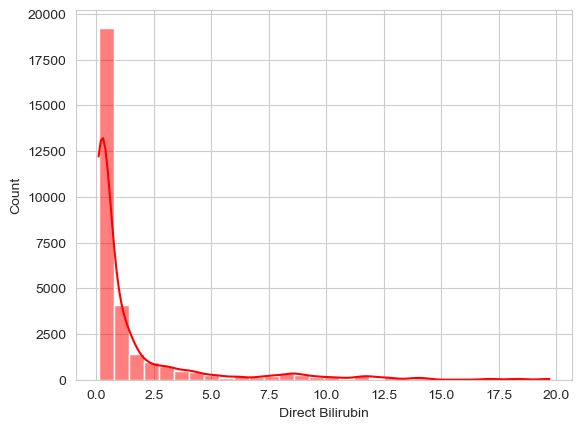

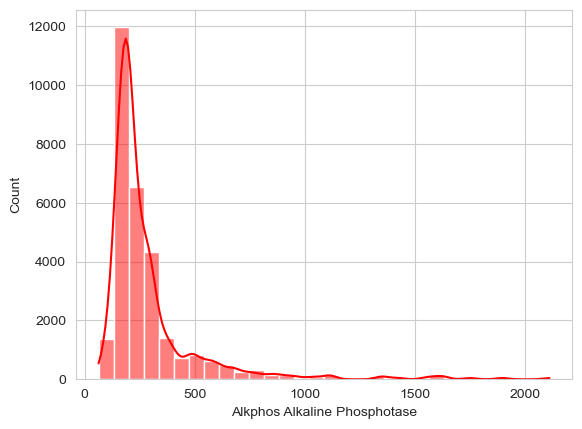

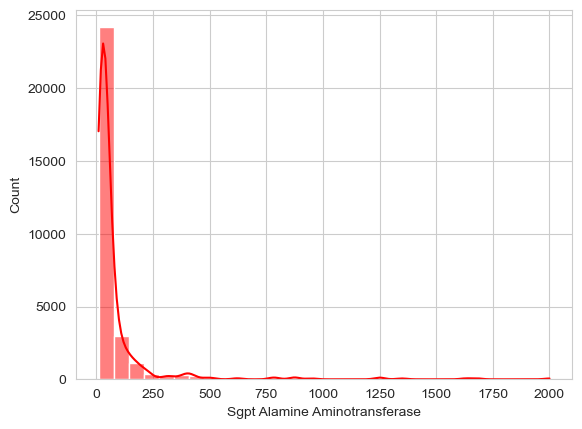

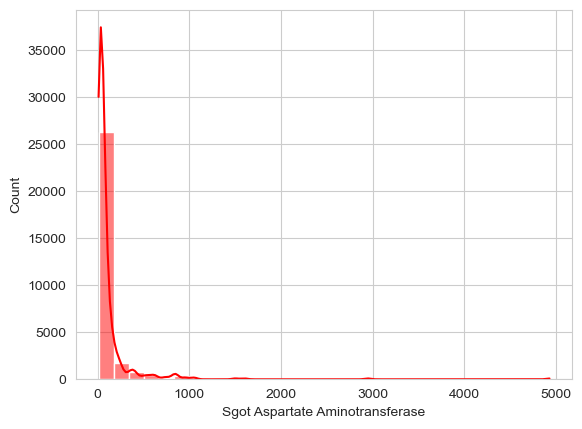

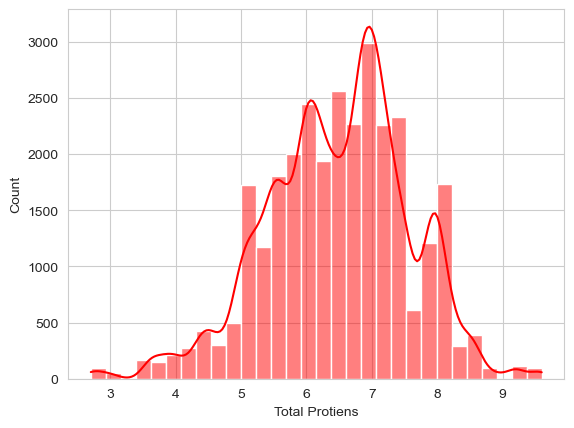

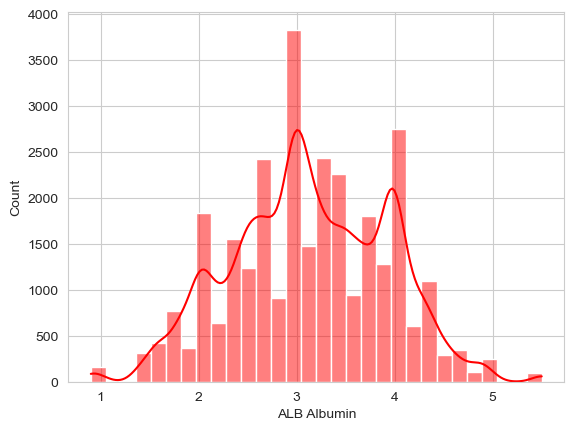

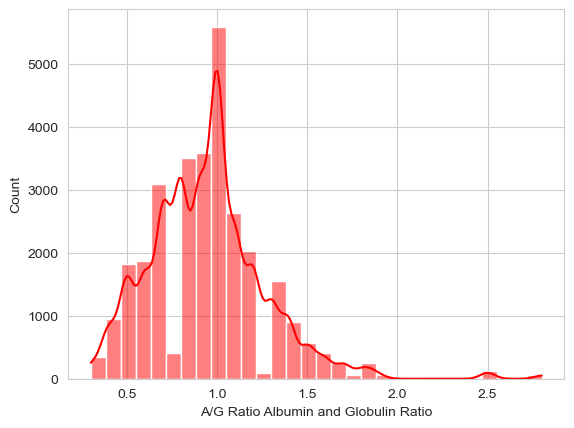

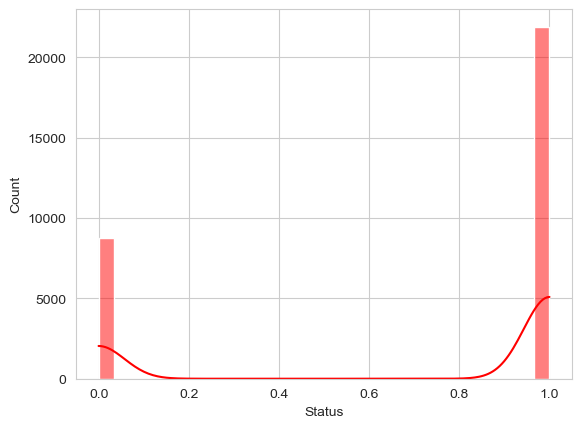

In [12]:
for col in numerical_cols:
    sns.set_style('whitegrid')
    sns.histplot(data[col], kde = True, color ='red', bins = 30)
    plt.xlabel(col)
    plt.show()

HANDLING OUTLIERS FOR COLUMNS: - 
AGE
TOTAL PROTIENS

In [13]:
# def limit_outliers(column,lower_factor=1.5,upper_factor=1.5):
#     valid_values=column[~np.isnan(column)]
#     q1=np.nanpercentile(valid_values,25)
#     q3=np.nanpercentile(valid_values,75)
#     iqr=q3-q1
#     lower_limit=q1-lower_factor*iqr
#     upper_limit=q3+upper_factor*iqr
#     return np.clip(column,lower_limit,upper_limit)
# outliers=[col for col in numerical_cols if col not in ['Gender','Status']]
# for col in outliers:
#     data[col]=limit_outliers(data[col])
#     sns.boxplot(data[col])
#     plt.xlabel(col)
#     plt.show()

C:\Users\vthakare\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


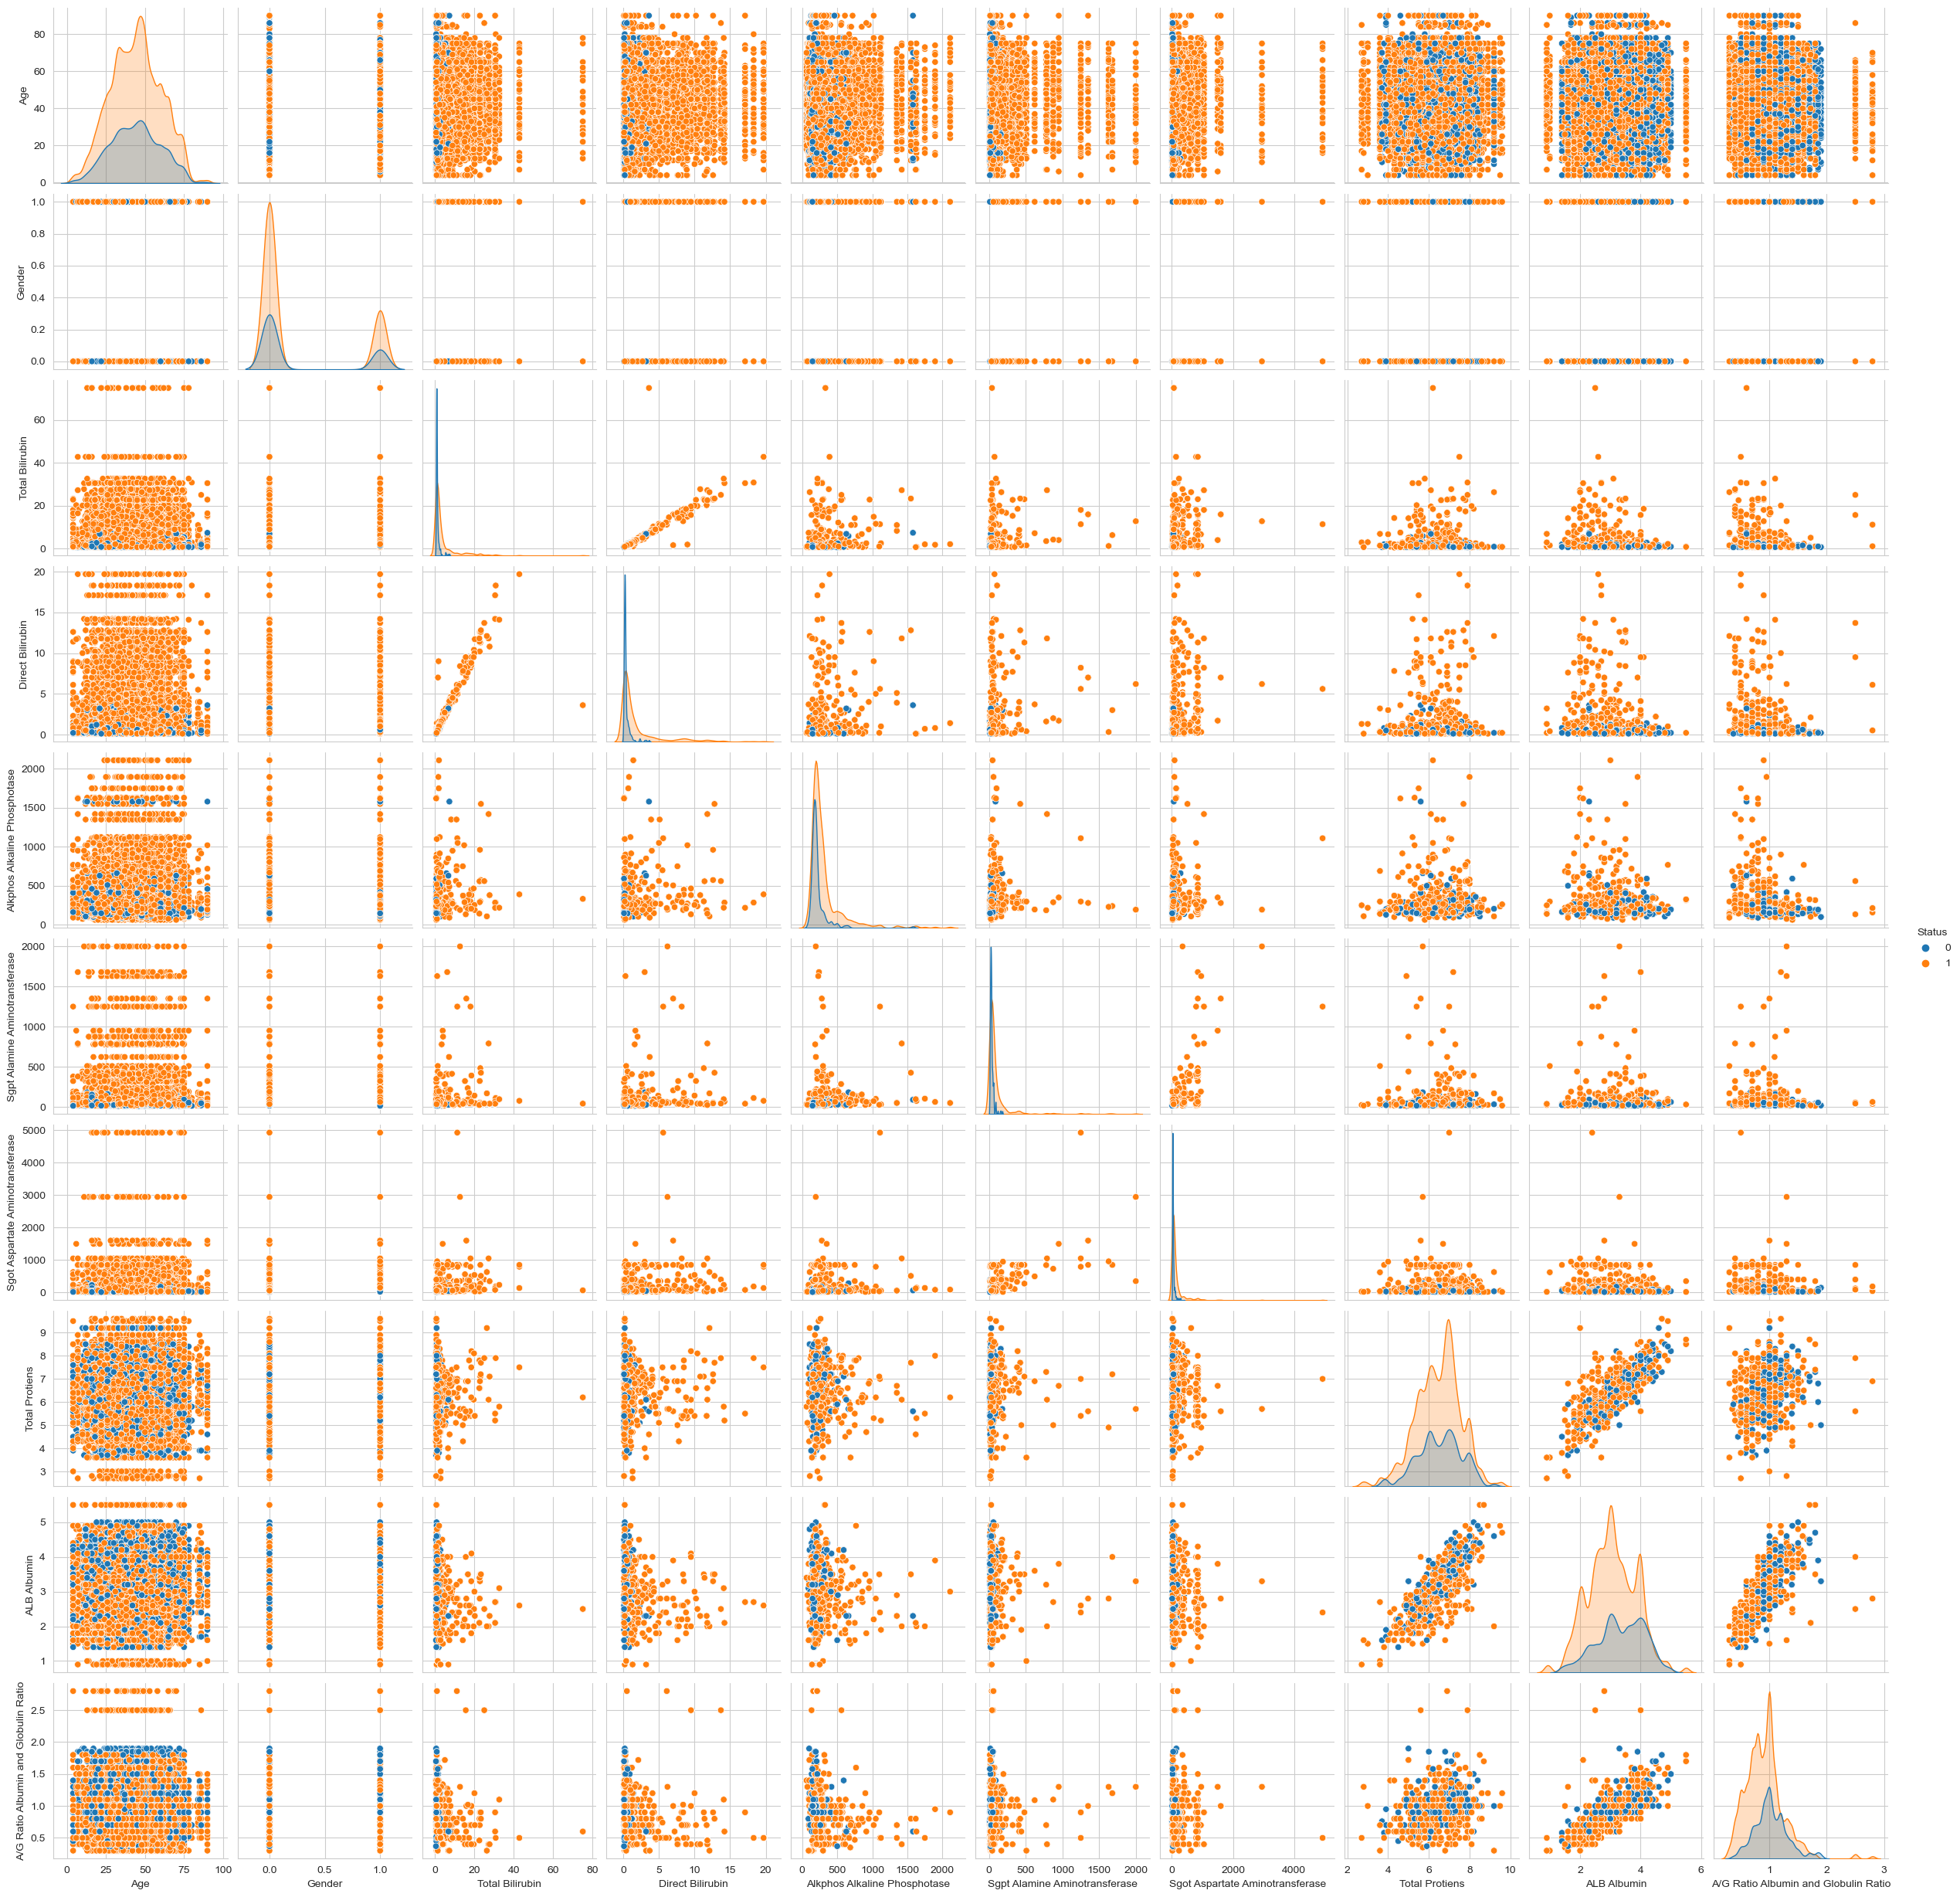

In [14]:
sns.pairplot(data,hue="Status",diag_kind='kde')

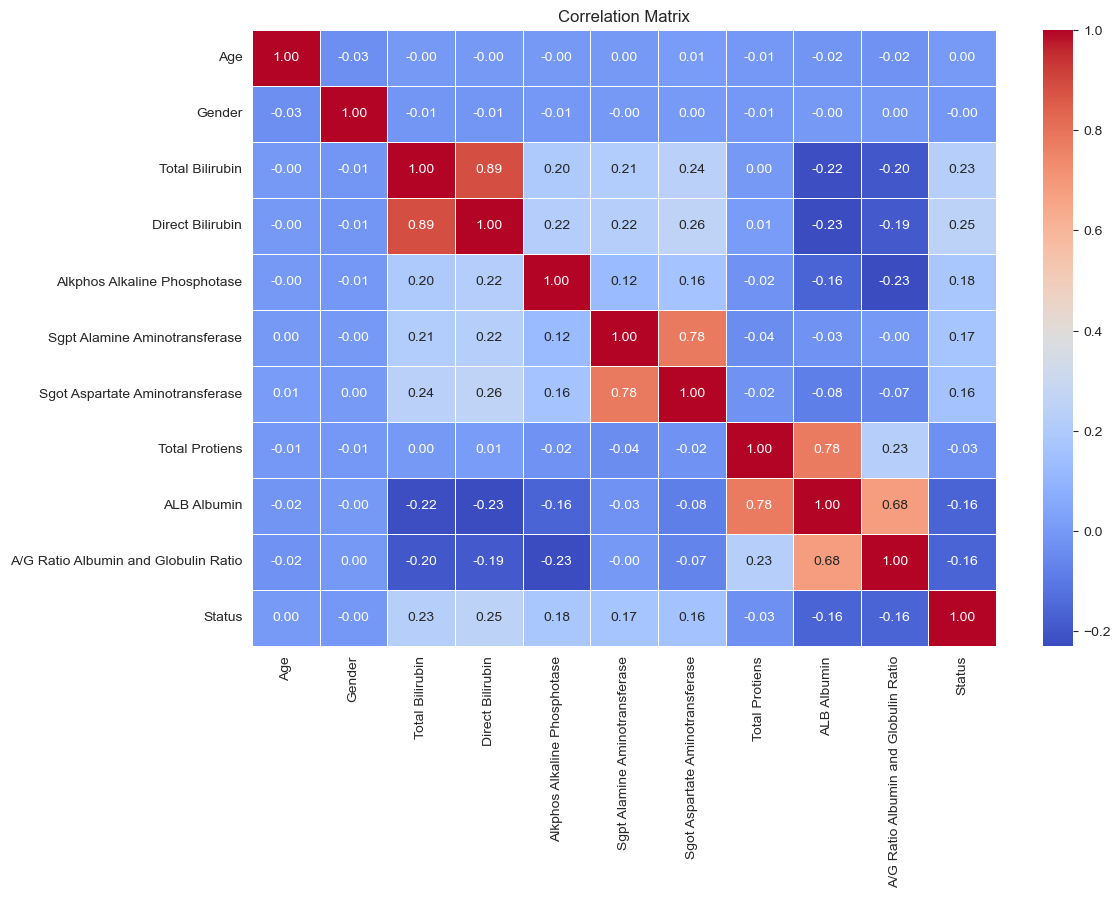

In [15]:
crr=data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(crr,annot=True , cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

1. 'TOTAL BILIRUBIN' AND 'DIRECT BILIRUBIN' CAN UTILISE THE COR-RELATION TO FILL MISSING VALUES.
2. THE COLUMNS AGE, TOTAL PROTIENS ,ALB ALBUMIN AND A/G RATIO SHOWS DISTRIBUTION THAT IS APPROXIMTELY NORMAL.
   HENCE, MEAN CAN BE USED TO HANDLE MISSING VALUES.
3. ON THE OTHER HAND, THE REMAINING NUMERICAL COLUMNS SHOE SKEWED DISTRIBUTION. HENCE, MEDIAN IS A BETTER ALTERNATIVE.

In [16]:
data[['Total Bilirubin','Direct Bilirubin']]

Total Bilirubin  Direct Bilirubin
0                  0.7               0.1
1                 10.9               5.5
2                  7.3               4.1
3                  1.0               0.4
4                  3.9               2.0
...                ...               ...
30672              2.0               1.0
30673              0.6               0.1
30674              1.4               0.5
30675              0.6               0.1
30676              0.8               0.2

[30677 rows x 2 columns]

In [17]:
normal_dist_col=['Age','Total Protiens','ALB Albumin','A/G Ratio Albumin and Globulin Ratio']
for col in normal_dist_col:
    data[col].fillna(data[col].mean(),inplace=True)

In [18]:
skewed_dist_col=[col for col in numerical_cols if col not in normal_dist_col]
for col in skewed_dist_col:
    data[col].fillna(data[col].median(),inplace=True)

In [19]:
data['Gender'].fillna('not_mentioned',inplace=True)
data['Gender']=data['Gender'].replace(0.0,'male')
data['Gender']=data['Gender'].replace(1.0,'female')
data['Gender']

0        female
1          male
2          male
3          male
4          male
          ...  
30672    female
30673      male
30674      male
30675      male
30676      male
Name: Gender, Length: 30677, dtype: object

IDENTIFYING ANY RELATIONSHIP BETWEEN NUMERICAL COLUMNS AND DEPENDENT VARIABLE 'STATUS'

PAIR PLOT

C:\Users\vthakare\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


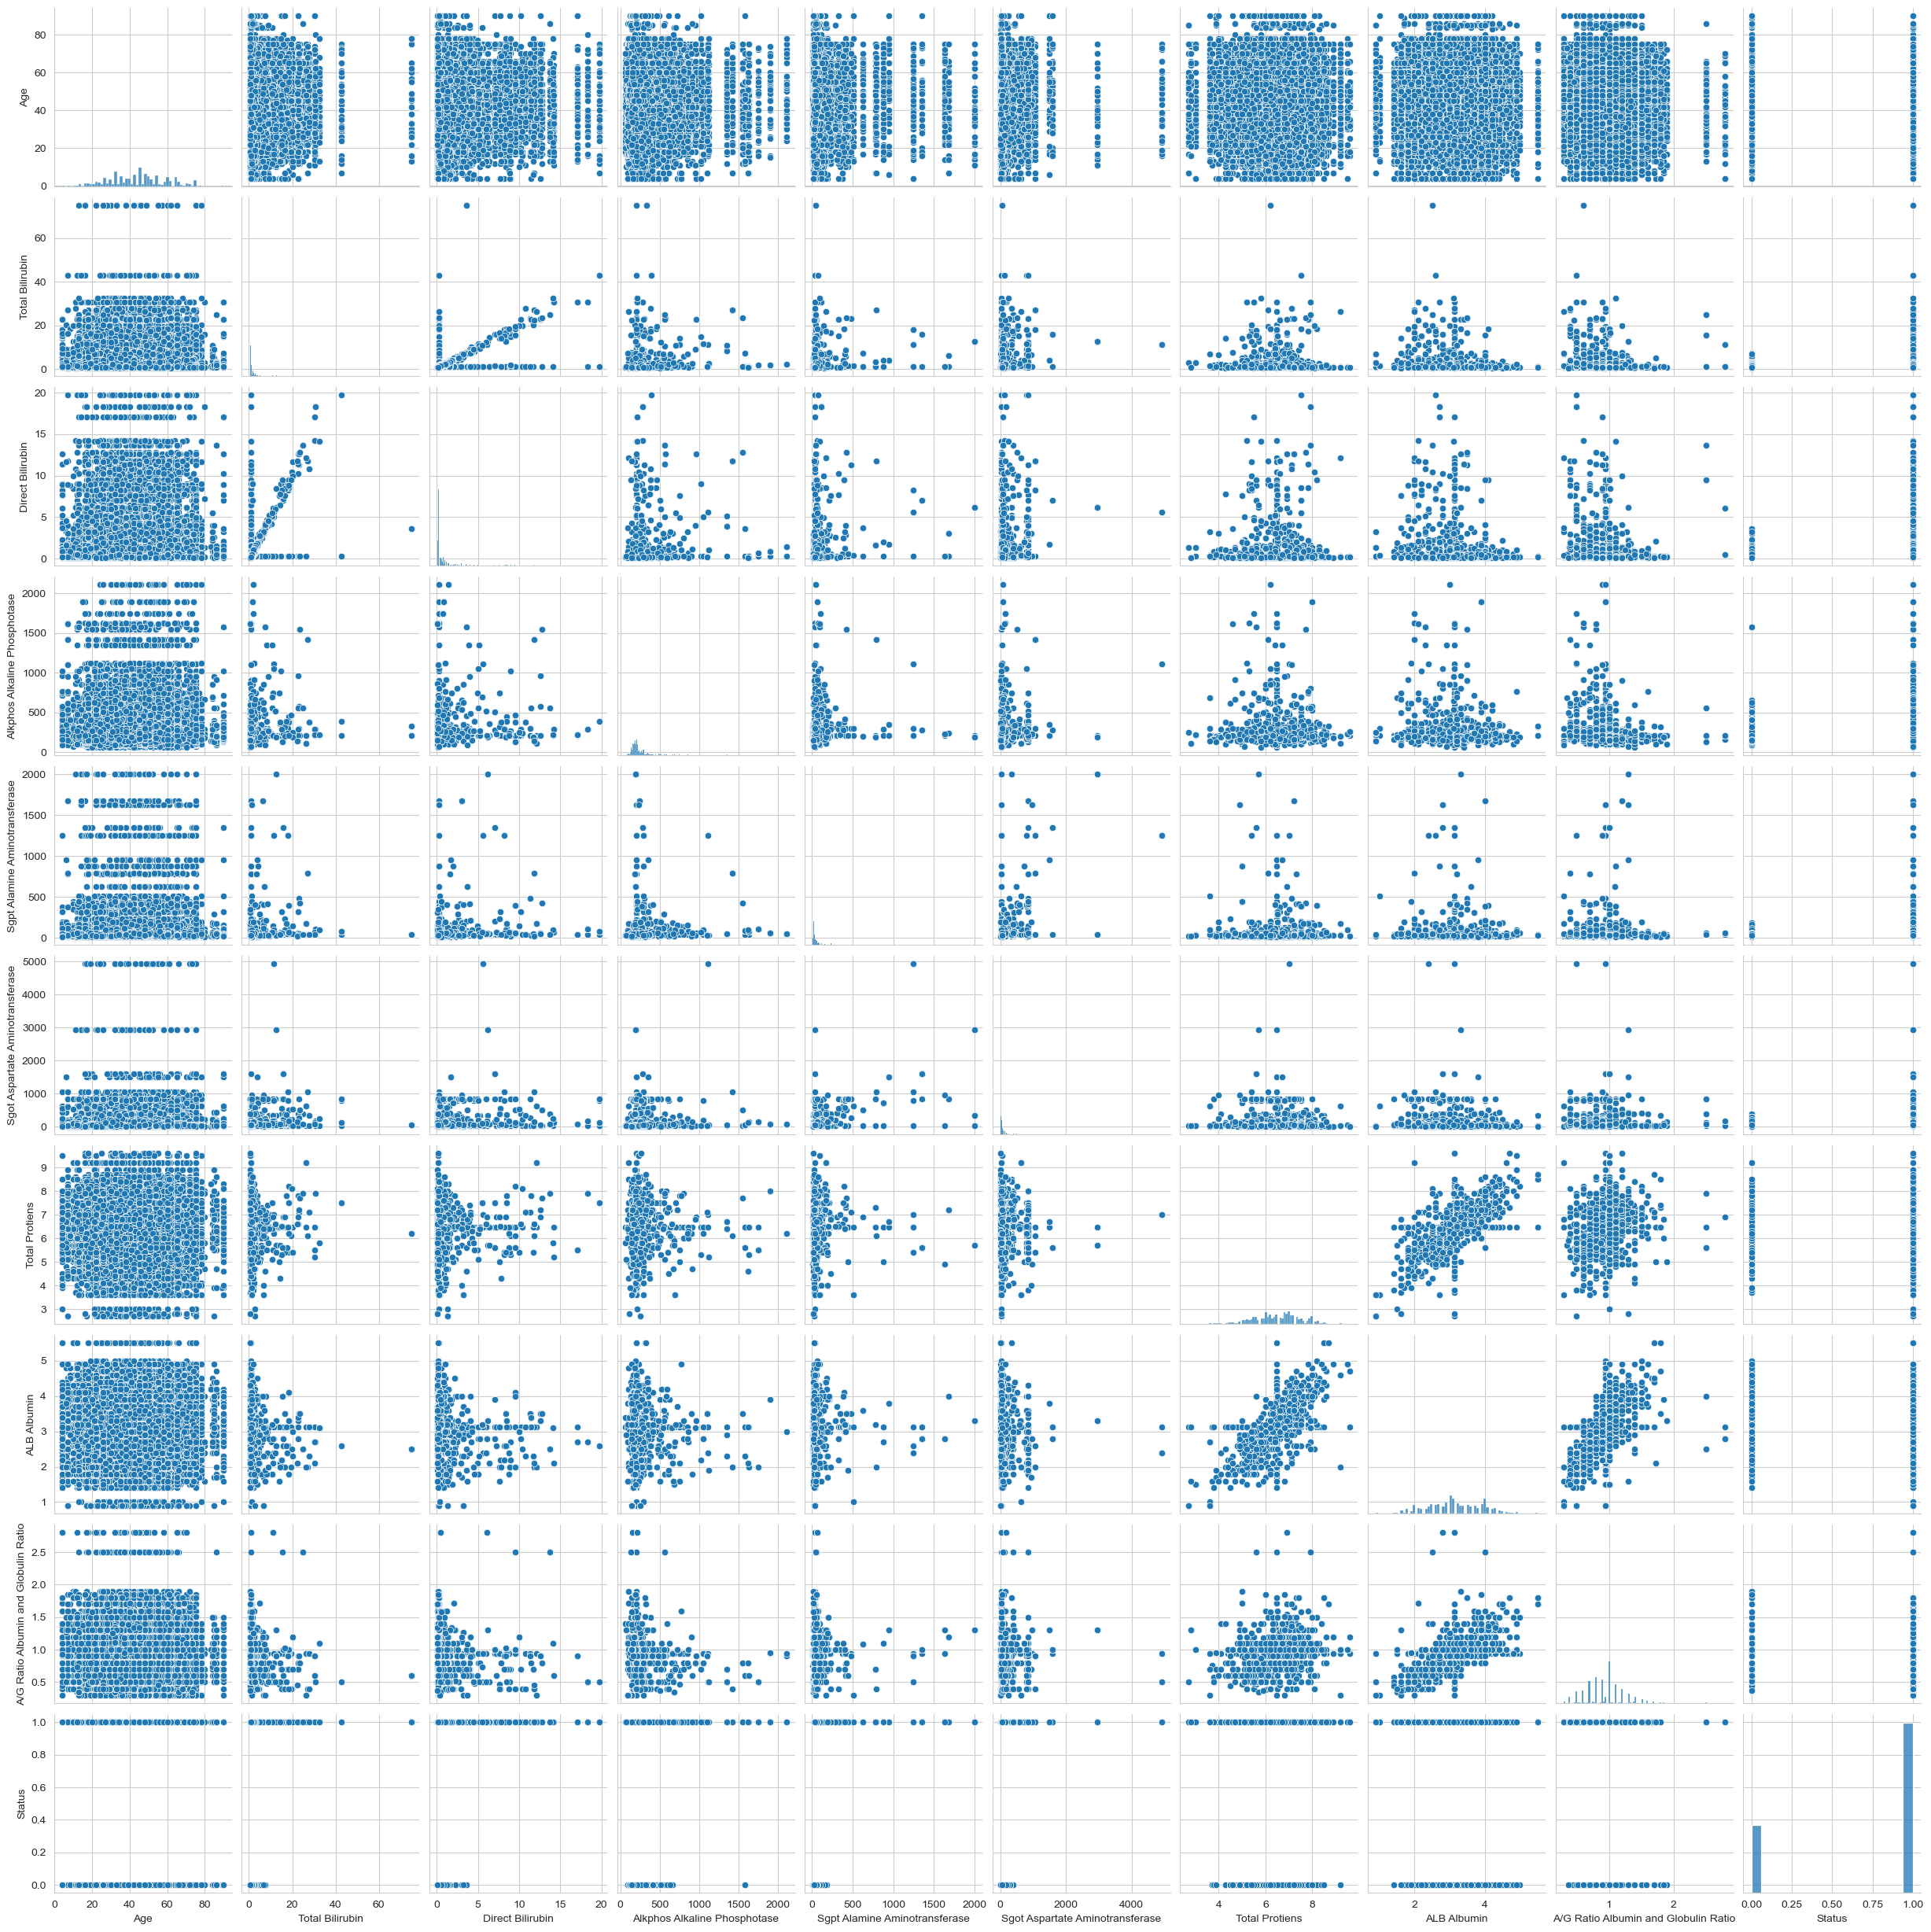

In [21]:
sns.pairplot(data)

IDENTIFING ANY RELATIONSHIP BETWEEN CATEGORICAL COLUMNS AND DEPENDENT VARIABLE 'STATUS'

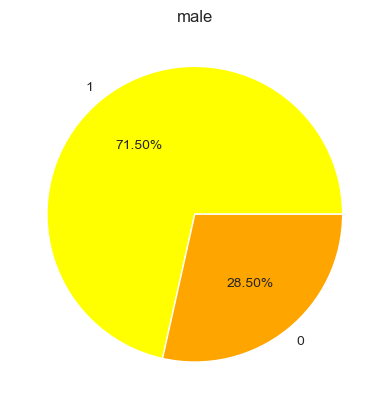

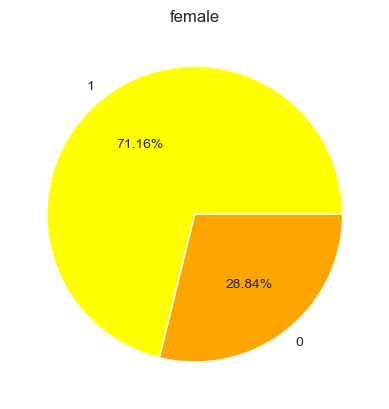

In [22]:
for gender in data['Gender'].value_counts().index:
    data1=data[data['Gender']==gender]
    data1=data1[['Gender','Status']]
    lable=data1.Status.value_counts().index
    value=data1.Status.value_counts().values
    plt.pie(value,labels=lable,autopct='%1.2f%%',colors=['yellow','orange'])
    plt.title(gender)
    plt.show()

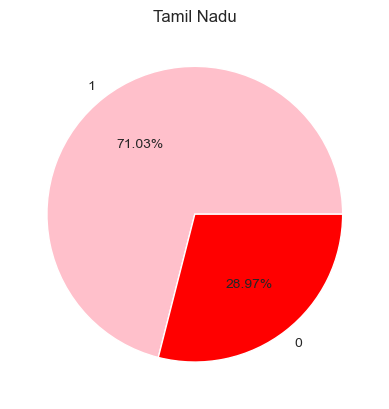

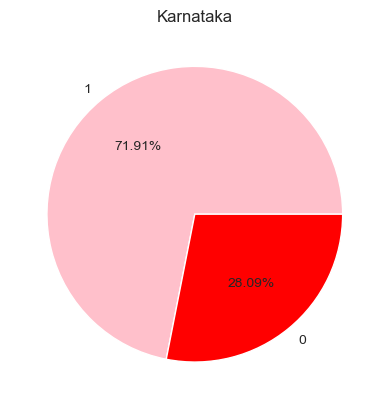

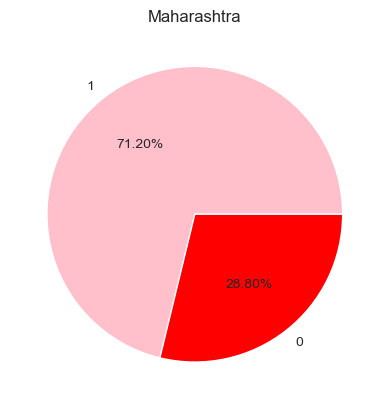

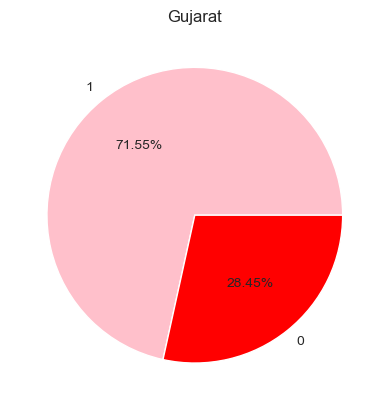

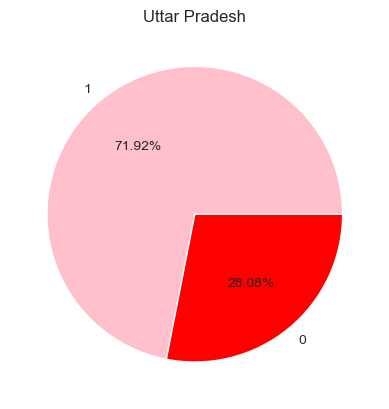

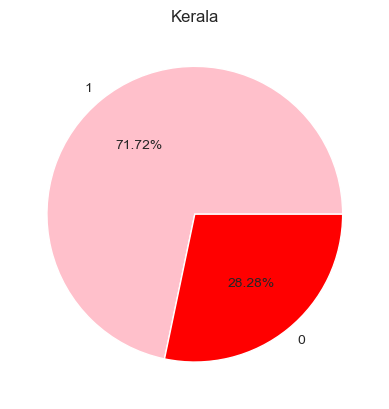

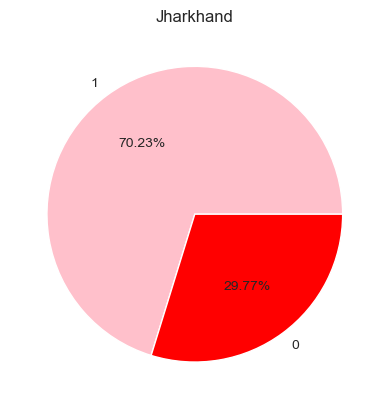

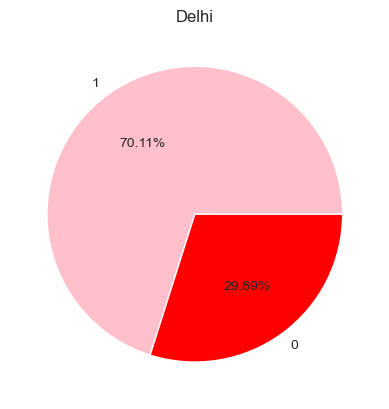

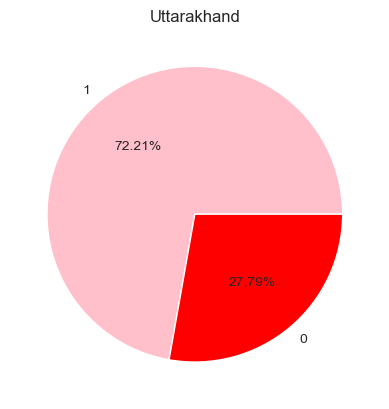

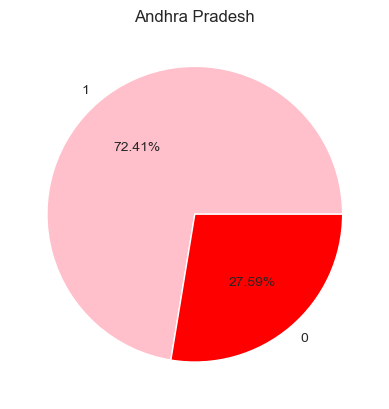

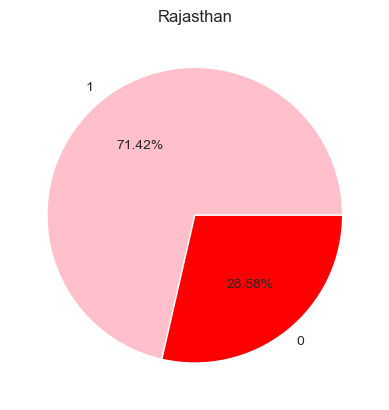

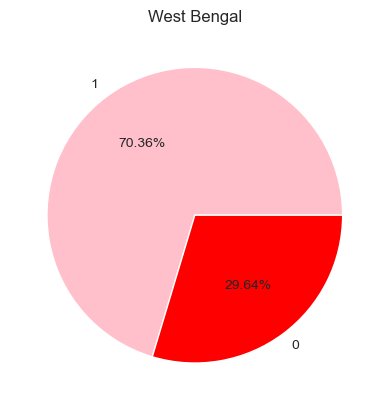

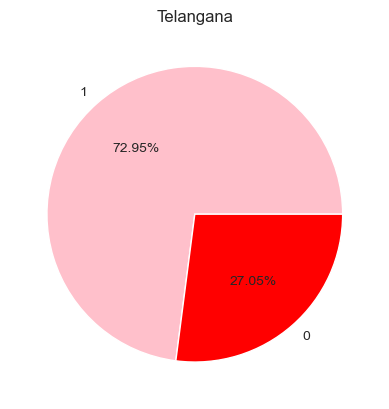

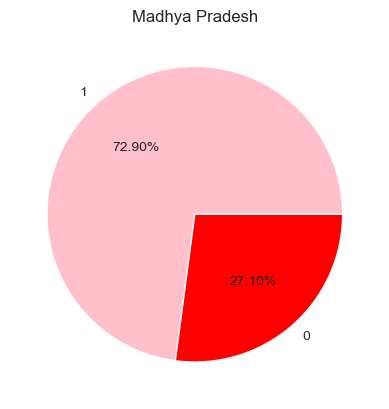

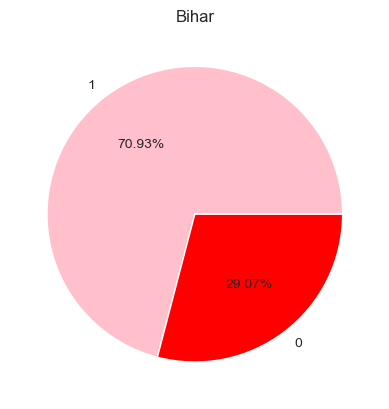

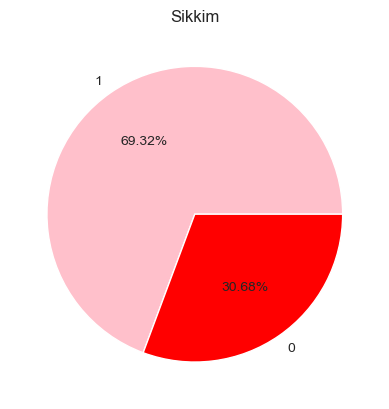

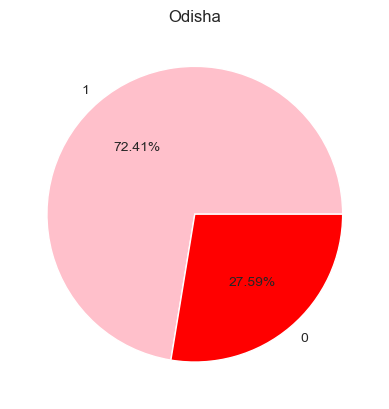

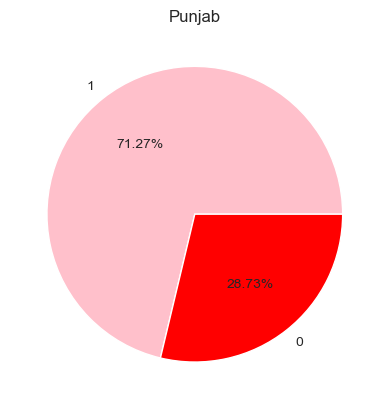

In [23]:
for state in data['State Name'].value_counts().index:
    data1=data[data['State Name']==state]
    data1=data1[['State Name','Status']]
    lable=data1.Status.value_counts().index
    value=data1.Status.value_counts().values
    plt.pie(value,labels=lable,autopct='%1.2f%%',colors=['pink','red'])
    plt.title(state)
    plt.show()